## Data Visualisation - Graded Questions


`Note` - *This stub file doesn't contain the conceptual questions asked on the platform*

### I) Marks Analysis

In the **'Marks.csv'** file, you can find the scores obtained by 200 students in 4 subjects of a standardised test. The different columns - `Score A`, `Score B`, `Score C` and `Score D` indicate the score obtained by a particular student in the respective subjects A, B, C and D.



Load the dataset to your notebook and answer the following questions

In [1]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
df1 = pd.read_csv('Marks.csv')
df1

,Score A,Score B,Score C,Score D
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


**Q1)** Load the dataset and plot a histogram for the `Score A` column by keeping the `number of bins to 6`. Which bin range among the following has the highest frequency?

(`Note` - *The bin ranges mentioned in the options are approximate values for the bin ranges that you'll actually get when you plot the histogram*)

    a)0-50
    b)50-100
    c)150-200
    d)200-250

C:\Users\ADMIN\anaconda3_setup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Highest frequency: 45 in bin range: (197.83333333333331, 247.11666666666665)


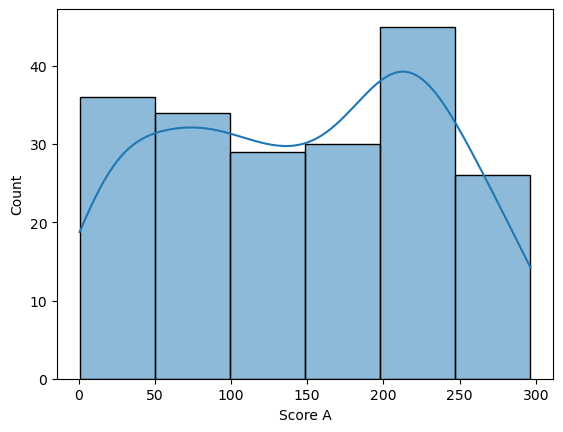

In [3]:
#Your code here
df1['Score A'].isnull().sum()
#plt.hist(df1['Score A'],bins=6)
hist = sns.histplot(df1['Score A'],bins=6,kde=True)
#plt.show()

# Access the histogram data
bin_counts = hist.patches

# Initialize variables to track the highest frequency and corresponding bin range
max_height = 0
max_range = (0, 0)

# Find the bin with the highest frequency
for patch in bin_counts:
    height = patch.get_height()
    if height > max_height:
        max_height = height
        max_range = (patch.get_x(), patch.get_x() + patch.get_width())

print(f"Highest frequency: {max_height} in bin range: {max_range}")

# Display the plot
plt.show()








**Q2)** Plot a box plot for the column `Score C` and choose the correct option.

    A - The 25th percentile lies between 20 and 40
    B - The 75th percentile lies between 40 and 60
    C - The 25th percentile lies between 0 and 20
    D - Both B and C

12.75 45.1


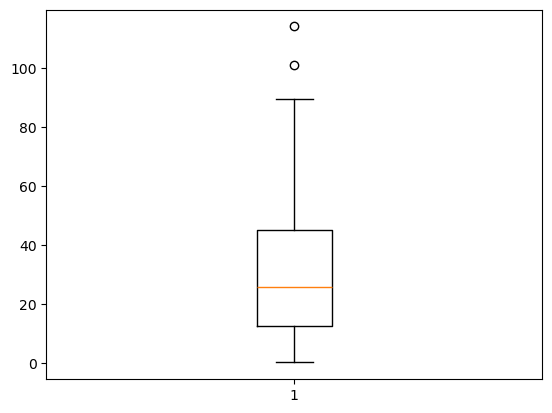

In [4]:
#Your code here
df1['Score C'].isnull().sum()
Q1 = df1['Score C'].quantile(0.25)
Q3 = df1['Score C'].quantile(0.75)

print(Q1,Q3)

plt.boxplot(df1['Score C'])
plt.show()

### II) Superstore Data

In the `superstore.csv` file, you have the details of orders purchased in an American online retail store. Load the dataset, observe and analyse the different columns and answer the following questions.

C:\Users\ADMIN\anaconda3_setup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3_setup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


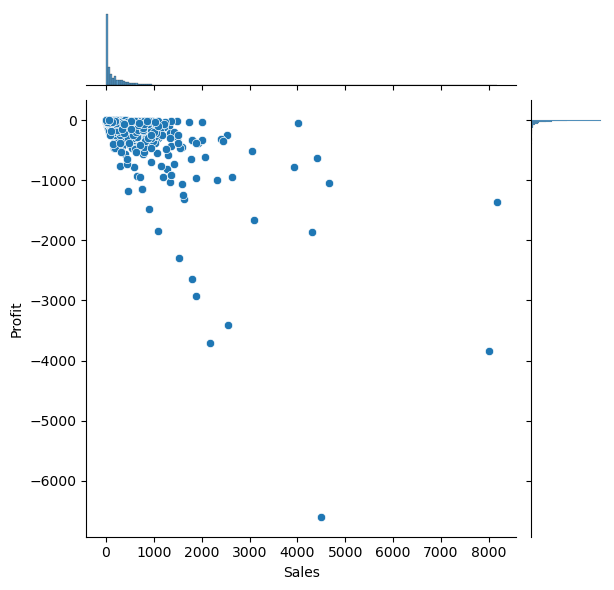

In [5]:
#Load the dataset
df2 = pd.read_csv('superstore.csv')
df2.head()
#df2['Sales'].isnull().sum()
#df2['Profit'].isnull().sum()

df3 = df2[(df2.Profit < 0) & (df2.Sales < 15000)]
sns.jointplot(data=df3,x='Sales', y='Profit')
plt.show()



**Q4)** Plot a pie-chart to find the Ship Mode through which most of the orders are being delivered.

     a)Standard Class
     b)First Class
     c)Second Class
     d)Same Day
     

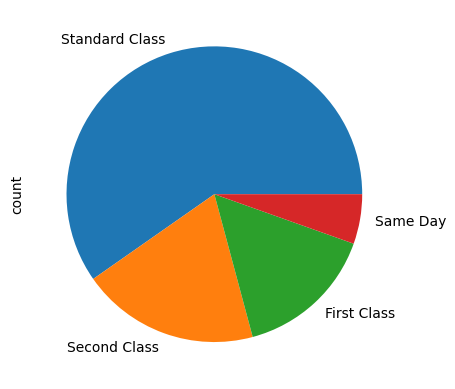

In [12]:
#Your code here
df2.head()
#df2['Ship Mode'].value_counts()
#df2['Ship Mode'].describe()
#plt.pie(df2['Ship Mode'])
#plt.show()
df2['Ship Mode'].value_counts().plot.pie()
plt.show()

**Q5)** Plot a bar chart comparing the average `Discount` across all the `Regions` and report back the `Region` getting the highest average discount

**Note** - You need to clean the `Discount` column first

    a)Central
    b)South
    c)West
    d)East

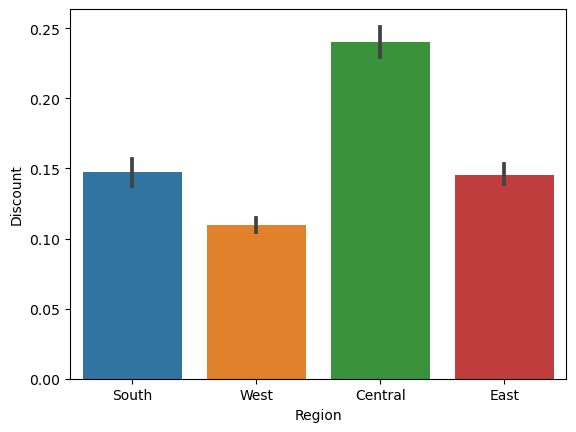

In [31]:
#Your code here
df2.head()

#df2['Discount'] = df2['Discount'].replace(r'[%]', '', regex=True)
#df2['Discount'] = pd.to_numeric(df2['Discount'], errors='raise', downcast=None)
#print(df2['Discount'])
df2['Discount']= df2['Discount'].apply(lambda x: float(x[:-1])) ##remove % from discount column values
df2['Discount'] = df2['Discount'].fillna(df2['Discount'].mode()[0])
df2['Discount'].isnull().sum()
df2['Discount'].value_counts()
#df2['Region'].value_counts().plot.bar()
#plt.show()

# Create a bar plot comparing the average Discount across all Regions
sns.barplot(x=df2['Region'], y=df2['Discount'], data=df2, estimator=np.mean)
plt.show()